# 1. Importing data and libraries

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [87]:
# Create a path
path = r'/Users/marcela/Library/CloudStorage/OneDrive-Pessoal/CF/Machine Learning/Achievement/Data Sets'

In [88]:
# Delimiting columns displayed
pd.options.display.max_columns = None

In [89]:
# Import pleasant weather answers data set
df_pleasant_weather = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [90]:
# Import X_cleaned.pkl
X = pd.read_pickle(os.path.join(path, 'X_cleaned.pkl'))

In [91]:
df_pleasant_weather.shape

(22950, 16)

In [92]:
X.shape

(22950, 135)

In [93]:
X.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.0304,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.0292,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7,5.3,6,0.92,1.0165,0.28,0.0

In [94]:
# Import unscaled mean temperatures data set
df_unscaled = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)

# 2. Data Wrangling

In [95]:
# Reducing dataset to 1970s
dfdecade = df_unscaled[df_unscaled['DATE'].astype(str).str.contains('197')]
dfdecade

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
3653,19700101,1,8,2.1,0.83,1.018,0.18,0.00,0,0.0,-3.6,-4.1,-2.4,8,0.81,1.0000,0.37,1.18,0.0,0.5,-2.6,1.9,4,0.67,1.0170,0.18,0.07,0.0,-0.3,-1.6,0.6,4,2.6,0.74,1.0070,0.47,0.00,5.8,-9.5,-12.0,-4.8,8,3.2,0.85,1.0071,0.12,0.03,0,0.0,-8.9,-9.1,-7.8,0,0.85,0.00,9,-18.2,-21.2,-16.6,7,0.72,1.0104,0.13,0.01,0,0.0,0.2,-1.6,5.4,1.4,0.83,1.0068,0.12,0.04,0.0,-9.0,-11.3,-8.2,8,0.9,0.87,1.0009,0.41,0.09,0.0,-1.3,-2.6,0.2,7,1.5,0.84,1.0065,0.12,0.04,0.0,-8.8,-9.5,-7.6,5,2.5,0.78,1.0092,0.37,0.00,0.3,4.6,2.2,7.0,8,0.87,0.20,0.06,16,0.0,-5.3,-7.6,-4.5,8,1.3,0.92,0.9942,0.04,0.08,16,0.0,-3.9,-5.0,-2.7,3,2.6,0.73,1.0152,7.1,8.4,3,1.5,0.93,1.0151,0.72,0.00,4.9,-15.5,-16.7,-14.3,8,0.9975,0.05,1.27,0.0,-6.0,-7.0,-4.9,2.5,0.86,1.0169,0.16,0.00,-2.0,-3.6,-0.3,7,0.78,1.0156,0.28,0.18,0,0.6,

In [96]:
# Reducing pleasant dataset to 1970s
pleasant_seventies = df_pleasant_weather[df_pleasant_weather['DATE'].astype(str).str.contains('197')]
pleasant_seventies

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
3653,19700101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3654,19700102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3655,19700103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3656,19700104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3657,19700105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7300,19791227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7301,19791228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7302,19791229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7303,19791230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
# Dropping all columns regarding Gdansk, Roma, Tours from dfdecade, as they aren't included in pleasant weather
columns_to_drop = ['GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 
                   'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 
                   'GDANSK_temp_max', 'ROMA_cloud_cover', 'ROMA_wind_speed', 
                   'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean',
                   'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure',
                   'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 
                   'TOURS_temp_min', 'TOURS_temp_max']

# Using the drop() method to drop the specified columns
dfdecade.drop(columns=columns_to_drop, inplace=True)

/var/folders/gz/793390fs5lz_gt8d667yd0qw0000gn/T/ipykernel_81155/3169969185.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdecade.drop(columns=columns_to_drop, inplace=True)


In [98]:
dfdecade.shape

(3652, 149)

In [99]:
further_drops = ['BASEL_snow_depth',  'DUSSELDORF_snow_depth', 'HEATHROW_snow_depth',
                  'MUNCHENB_snow_depth', 'OSLO_snow_depth',  'VALENTIA_snow_depth',
                 'BASEL_wind_speed', 'DEBILT_wind_speed', 'DUSSELDORF_wind_speed',
                  'KASSEL_wind_speed', 'LJUBLJANA_wind_speed',  'MAASTRICHT_wind_speed',
                  'MADRID_wind_speed', 'OSLO_wind_speed','SONNBLICK_wind_speed',]

dfdecade.drop(columns=further_drops, inplace=True)

/var/folders/gz/793390fs5lz_gt8d667yd0qw0000gn/T/ipykernel_81155/2925106035.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdecade.drop(columns=further_drops, inplace=True)


In [100]:
dfdecade.drop(columns = ['DATE', 'MONTH'], inplace = True)

/var/folders/gz/793390fs5lz_gt8d667yd0qw0000gn/T/ipykernel_81155/695057663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdecade.drop(columns = ['DATE', 'MONTH'], inplace = True)


In [101]:
# Filling missing observations using nearby stations with similar weather:
# Ljubljana -> Kassel
# Sonnblick -> Munchen
# Oslo -> Stockholm

dfdecade.columns.get_loc('HEATHROW_temp_max')

53

In [102]:
dfdecade.columns.get_loc('MUNCHENB_humidity')

90

In [103]:
dfdecade.columns.get_loc('STOCKHOLM_cloud_cover')

115

In [104]:
dfdecade.insert(54,'KASSEL_cloud_cover', df_unscaled['LJUBLJANA_cloud_cover'])
dfdecade.insert(92,'MUNCHENB_pressure', df_unscaled['SONNBLICK_pressure'])
dfdecade.insert(118, 'STOCKHOLM_humidity', df_unscaled['OSLO_humidity'])
dfdecade.columns.tolist()

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',


In [105]:
dfdecade.shape

(3652, 135)

In [106]:
pleasant_seventies.shape

(3652, 16)

In [107]:
# Turning dfdecade and pleasant_seventies from a df to arrays (X and y)
X = np.array(dfdecade)
y = np.array(pleasant_seventies)

In [108]:
# Verifying array shape
X.shape

(3652, 135)

In [109]:
y = np.argmax( y, axis = 1)
y

array([0, 0, 0, ..., 0, 0, 0])

In [110]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.20, random_state = 21)

In [111]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2921, 135) (2921,)
(731, 135) (731,)


In [112]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

# 3. Random Forest Model

In [113]:
# Creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) #, max_depth = 5)  
  
# Training the model on the training dataset
# Fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [114]:
# Performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


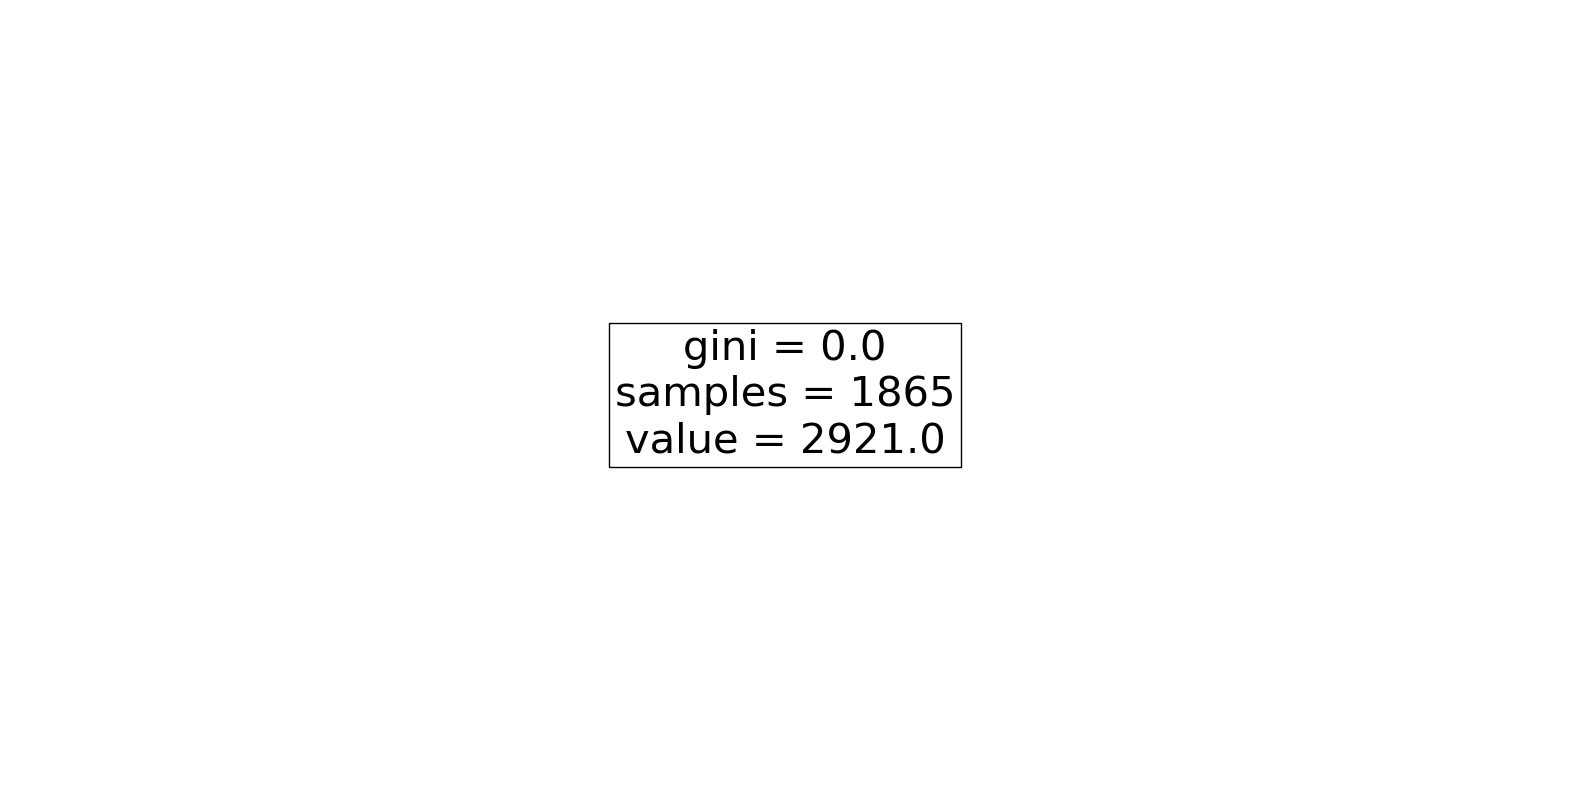

In [126]:
# Types = {0:'Unpleasant weather', 1:'Pleasant weather'}
fig = plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[15], fontsize = 30, filled=True);

Unique Stations: ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']
Characteristics per Station: [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8]


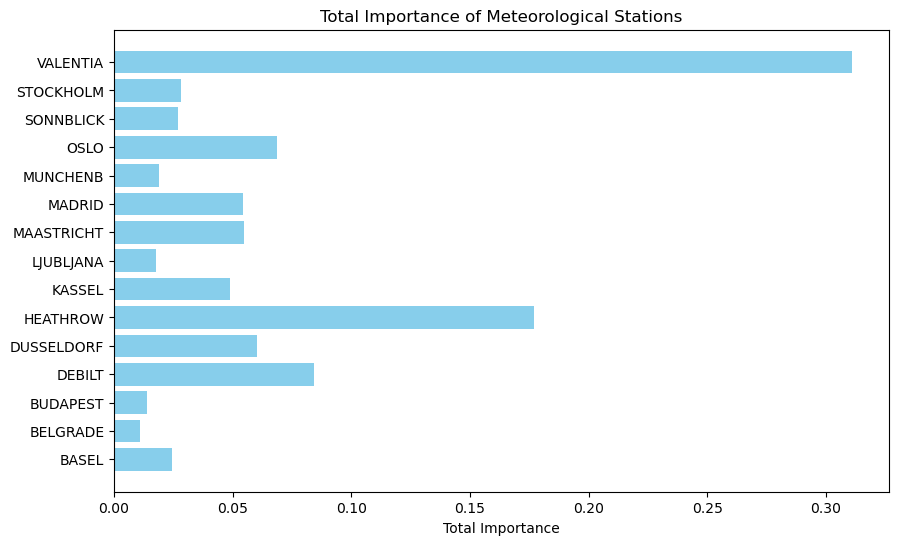

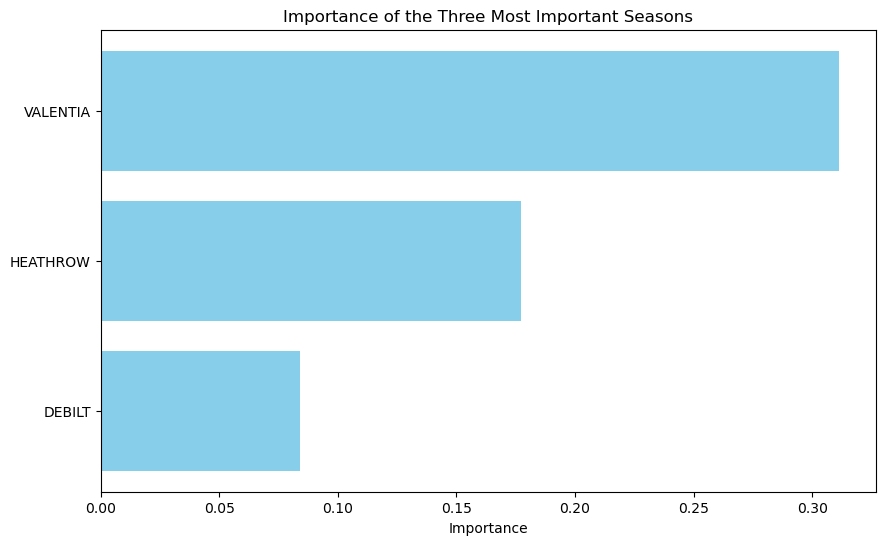

Names of the three most important stations: ['DEBILT', 'HEATHROW', 'VALENTIA']


In [146]:
# Get feature importances
importances = clf.feature_importances_

# Check unique station names and count features per station
station_characteristics = {}
for col in X.columns:
    station = col.split('_')[0]
    if station not in station_characteristics:
        station_characteristics[station] = 0
    station_characteristics[station] += 1

# Check station names and their features
unique_stations = list(station_characteristics.keys())
characteristics_per_station = list(station_characteristics.values())

print("Unique Stations:", unique_stations)
print("Characteristics per Station:", characteristics_per_station)

# Perform reshape based on exact count
importances_reshaped = []
start_idx = 0
for count in characteristics_per_station:
    end_idx = start_idx + count
    importances_reshaped.append(importances[start_idx:end_idx])
    start_idx = end_idx

# Collapse importances by season
importances_collapsed = [sum(imp) for imp in importances_reshaped]

# Sort and select the three most important stations
top_stations_indices = np.argsort(importances_collapsed)[-3:]
top_stations_importances = [importances_collapsed[idx] for idx in top_stations_indices]

# Mapping indexes to station names
top_stations_names = [unique_stations[idx] for idx in top_stations_indices]

# Visualize the importances
plt.figure(figsize=(10, 6))
plt.barh(unique_stations, importances_collapsed, color='skyblue')
plt.xlabel('Total Importance')
plt.title('Total Importance of Meteorological Stations')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(top_stations_names, top_stations_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Importance of the Three Most Important Seasons')
plt.show()

print("Names of the three most important stations:", top_stations_names)